Ce notebook va présenter des exemples d'images IRM utilisant différents types de séquences, (...)

On commence par récupérer des données (...)

In [2]:
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009

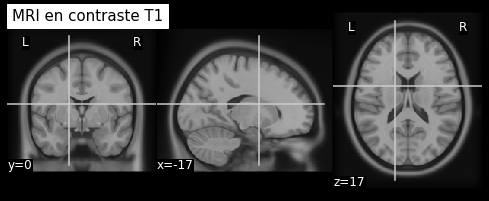

In [6]:
from nilearn.plotting import plot_anat
plot_anat(mni.t1, cut_coords=[-17, 0, 17], title='MRI en contraste T1')

In [9]:
from nilearn.plotting import view_img 
viewer = view_img(mni.t1, bg_img=None, title='MRI en contraste T1', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None,)

In [10]:
viewer.save_as_html('t1.html')

Open this [interactive viewer](t1.html) in a separate tab.

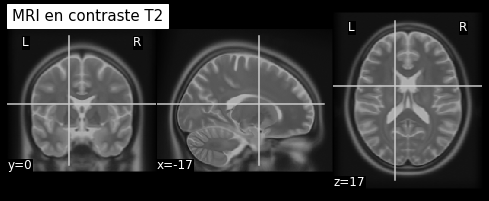

In [7]:
plot_anat(mni.t2, cut_coords=[-17, 0, 17], title='MRI en contraste T2')